In [1]:
import matplotlib.pyplot as plt
from networkx import nx

In [2]:
#Code copied from the networkx source code and modified so i can save the steps of the simulation
import networkx as nx
import random

def _random_subset(seq, m, rng):
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets

def barabasi_albert_steps(n,m,seed=None):    # Add m initial nodes (m0 in barabasi-speak)
    G = nx.empty_graph(m)
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        source += 1
        if source < 501 and source % 50 == 0 or source < 10:
            nx.write_edgelist(G, 'graphs/barabasi-albert/steps/ba-steps-{:03d}.csv'.format(source), delimiter=",", data=True)

barabasi_albert_steps(500,3) #n,m

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph_node_size(G,x,y):
    pos = nx.spring_layout(G, iterations=200)
    node_sizes =[10 + 20 * i for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    d = dict(G.degree)


    plt.figure(figsize=(x,y))
    nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], node_color='purple', alpha=0.7, edge_color='green')
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='purple', alpha=0.7)
    #edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, edge_color='green', width=2, edge_alphas=0.9)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    


In [4]:
import os
#Path for all graphs generated, with this notebook and the network.py cli
path = './graphs/'
files = []
# r=root, d=directories, f = files
index = 0
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))
            print('{:02d}'.format(index), file) #prints the folder and the file is contained
            index = index + 1



00 barabasi_albert_n5000_m3.csv
01 barabasi_albert_n5000_m3_1.csv
02 barabasi_albert_n5000_m4.csv
03 barabasi_albert_n5000_m4_1.csv
04 barabasi_albert_n500_m3.csv
05 barabasi_albert_n500_m3_1.csv
06 barabasi_albert_n500_m4.csv
07 barabasi_albert_n500_m4_1.csv
08 ba-steps-004.csv
09 ba-steps-005.csv
10 ba-steps-006.csv
11 ba-steps-007.csv
12 ba-steps-008.csv
13 ba-steps-009.csv
14 ba-steps-010.csv
15 ba-steps-015.csv
16 ba-steps-020.csv
17 ba-steps-025.csv
18 ba-steps-030.csv
19 ba-steps-035.csv
20 ba-steps-040.csv
21 ba-steps-045.csv
22 ba-steps-050.csv
23 ba-steps-100.csv
24 ba-steps-150.csv
25 ba-steps-200.csv
26 ba-steps-250.csv
27 ba-steps-300.csv
28 ba-steps-350.csv
29 ba-steps-400.csv
30 ba-steps-450.csv
31 ba-steps-500.csv
32 erdos_renyi_0_n500_p0.001.csv
33 erdos_renyi_1_n500_p0.001.csv
34 erdos_renyi_2_n500_p0.001.csv
35 erdos_renyi_3_n500_p0.001.csv
36 erdos_renyi_4_n500_p0.001.csv
37 erdos_renyi_5_n500_p0.001.csv
38 erdos_renyi_6_n500_p0.001.csv
39 erdos_renyi_7_n500_p0.001.

In [5]:
g_list = []
for i in range(len(files)):
    g_list.append(nx.read_edgelist(files[i],delimiter=','))

print("All graphs appended")

All graphs appended


./graphs/barabasi-albert\steps\ba-steps-004.csv


C:\Users\willw\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


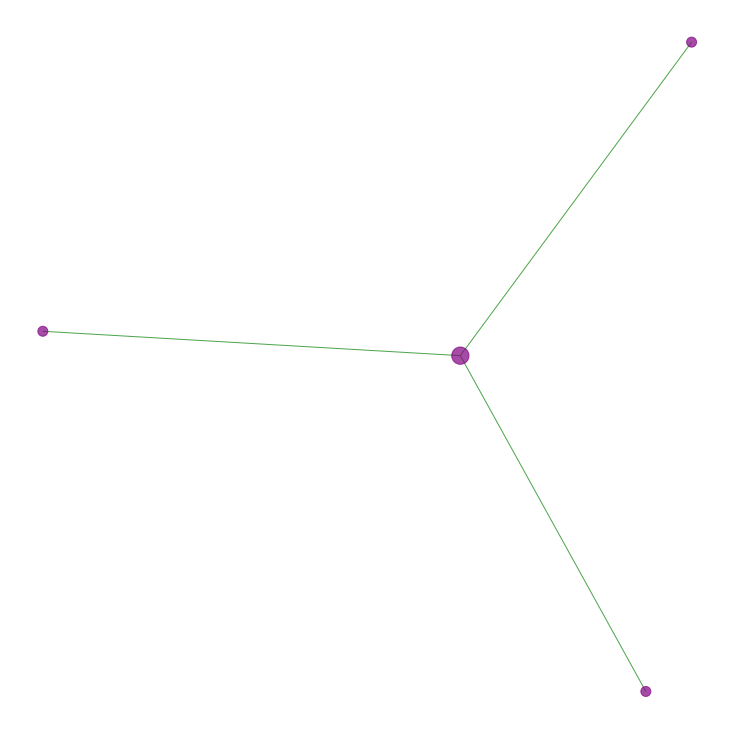

./graphs/barabasi-albert\steps\ba-steps-005.csv


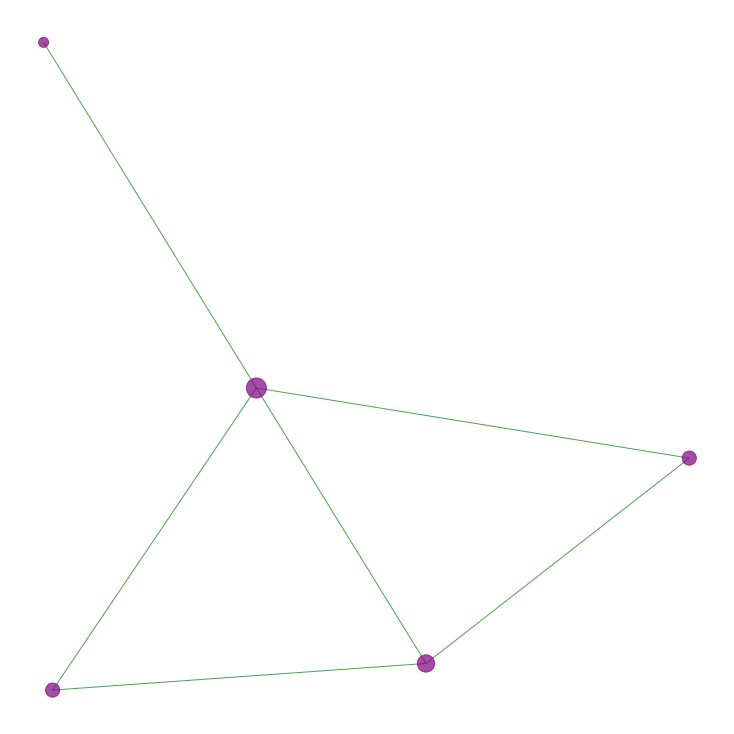

./graphs/barabasi-albert\steps\ba-steps-006.csv


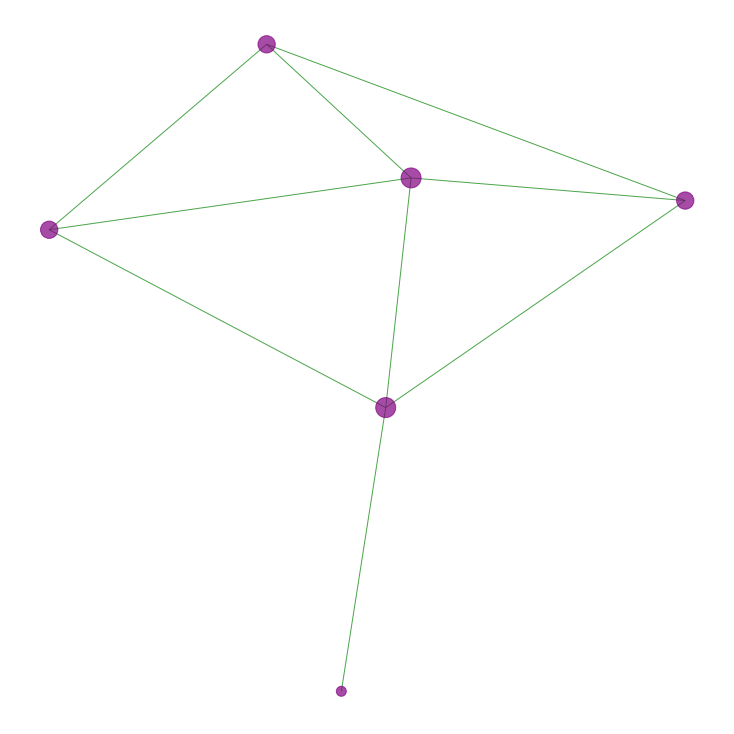

./graphs/barabasi-albert\steps\ba-steps-007.csv


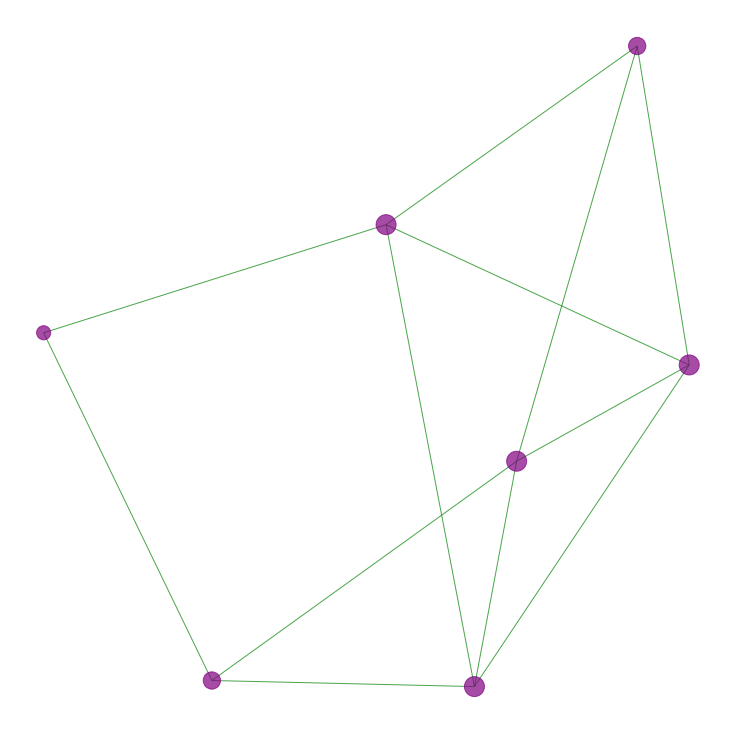

./graphs/barabasi-albert\steps\ba-steps-008.csv


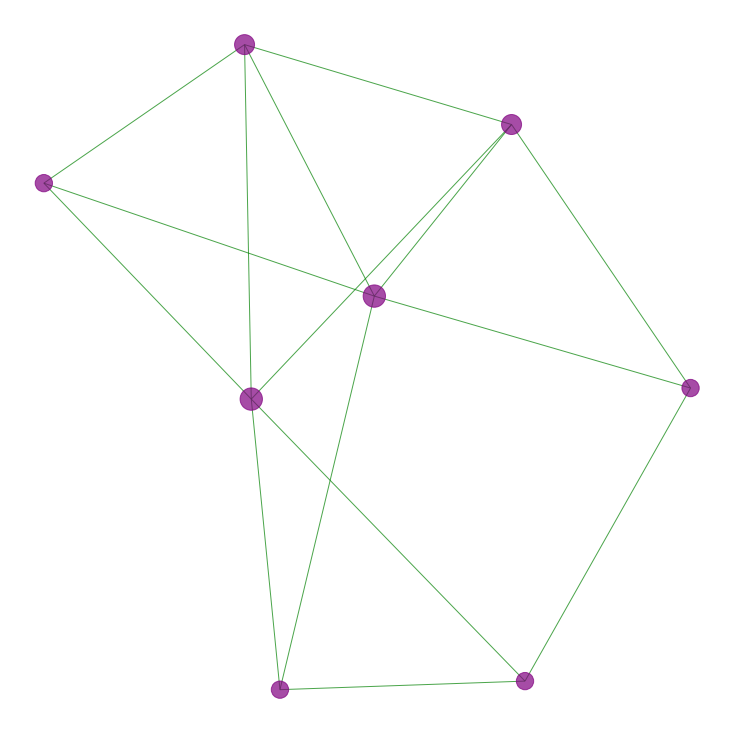

./graphs/barabasi-albert\steps\ba-steps-009.csv


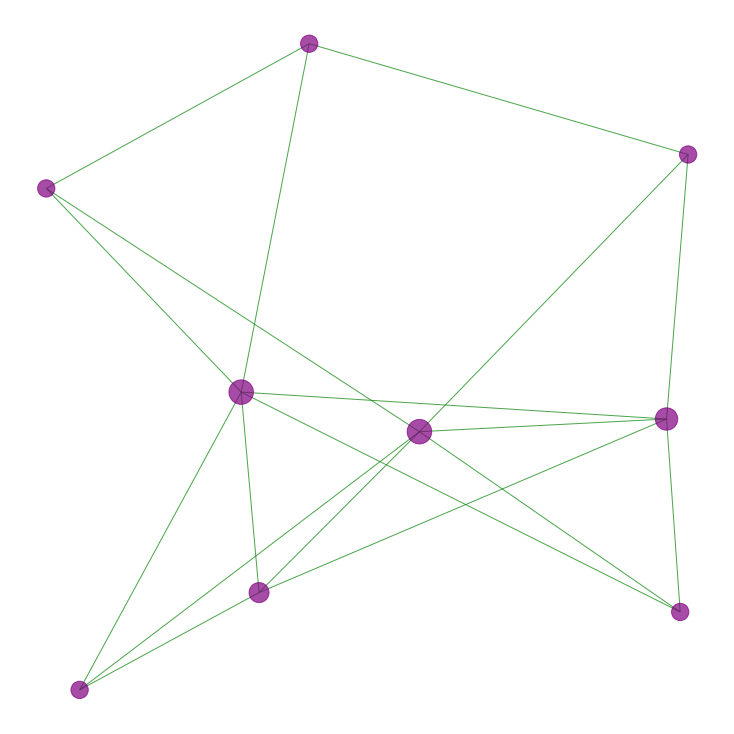

./graphs/barabasi-albert\steps\ba-steps-010.csv


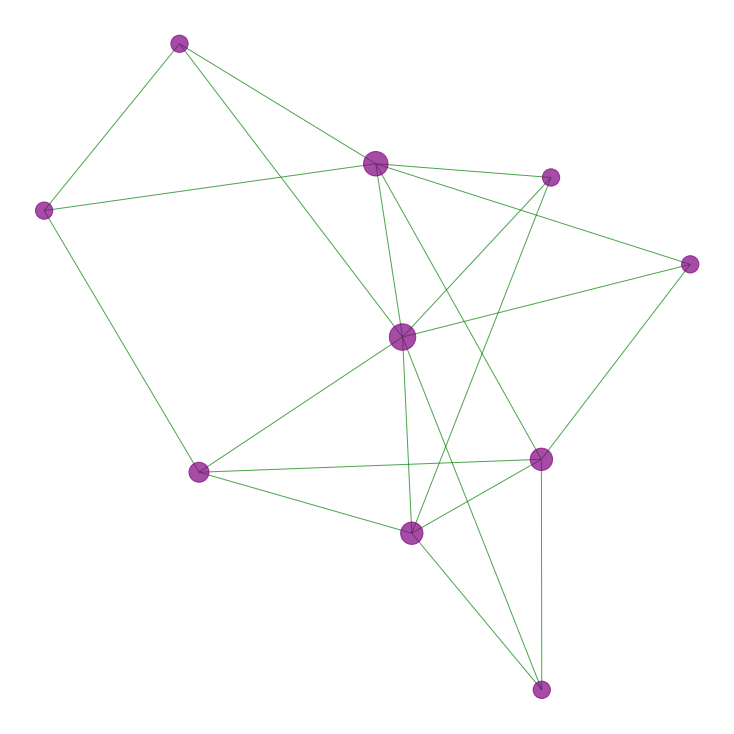

./graphs/barabasi-albert\steps\ba-steps-015.csv


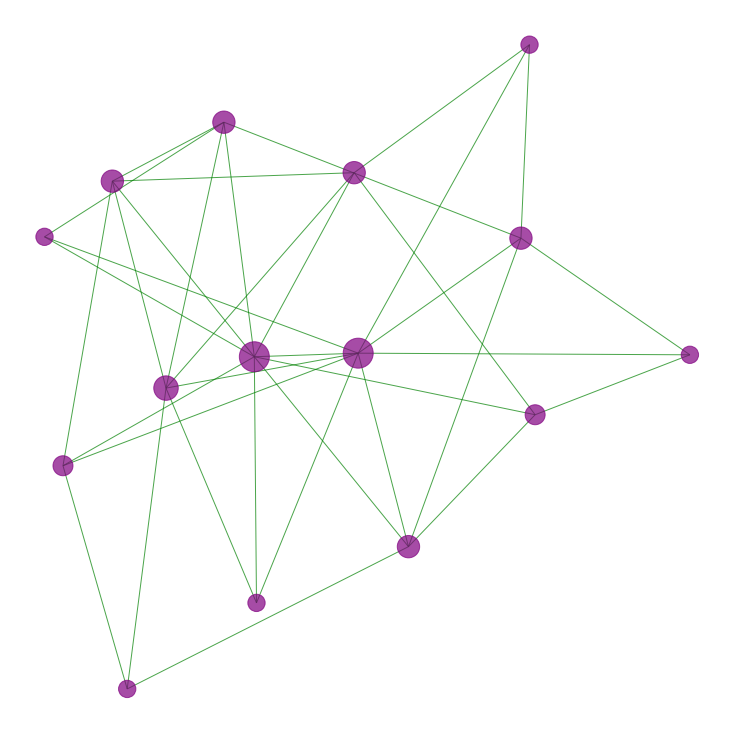

./graphs/barabasi-albert\steps\ba-steps-020.csv


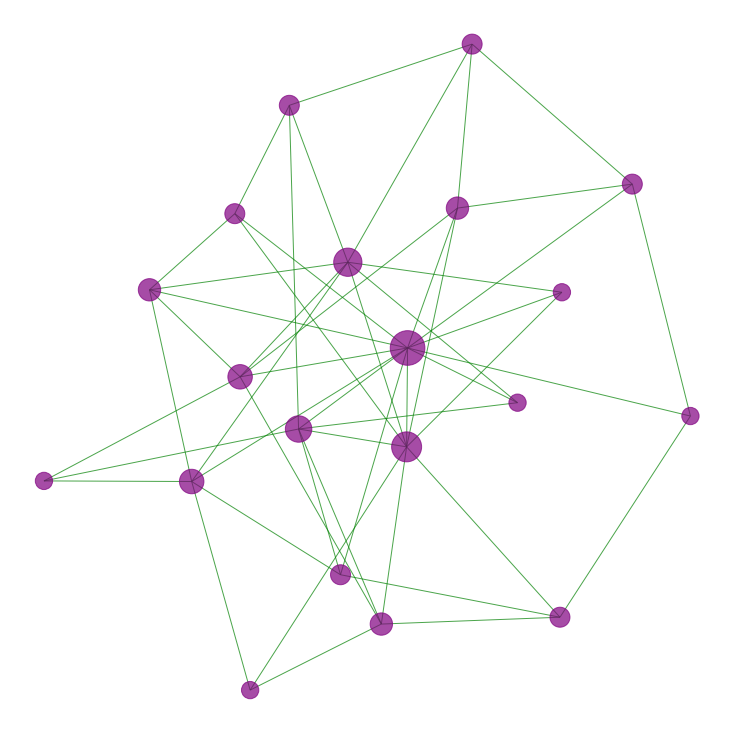

./graphs/barabasi-albert\steps\ba-steps-025.csv


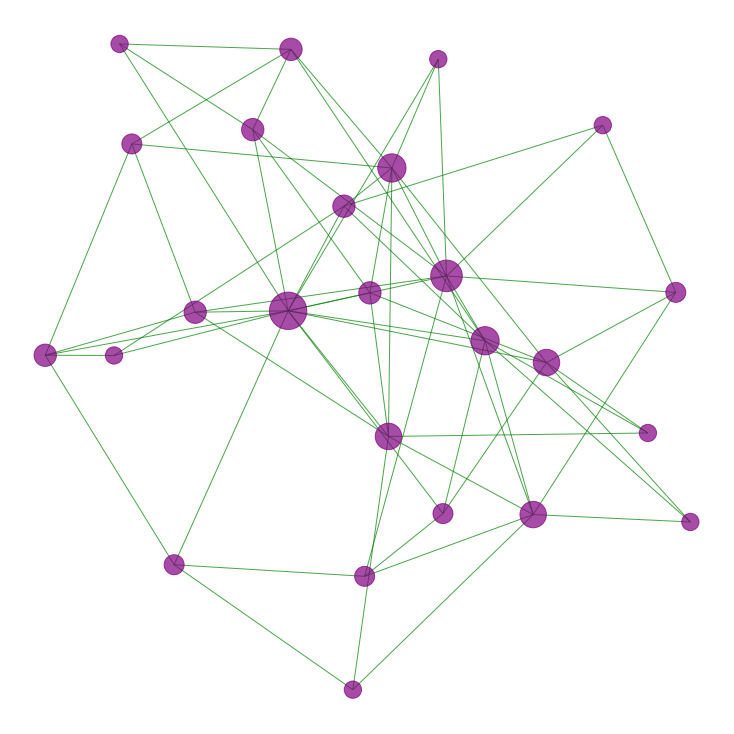

In [6]:
#barabasi albert steps
for i in range(8,18):
    print(files[i])
    draw_graph_node_size(g_list[i],10,10)

./graphs/erdos-renyi\critica\erdos_renyi_5_n500_p0.002.csv


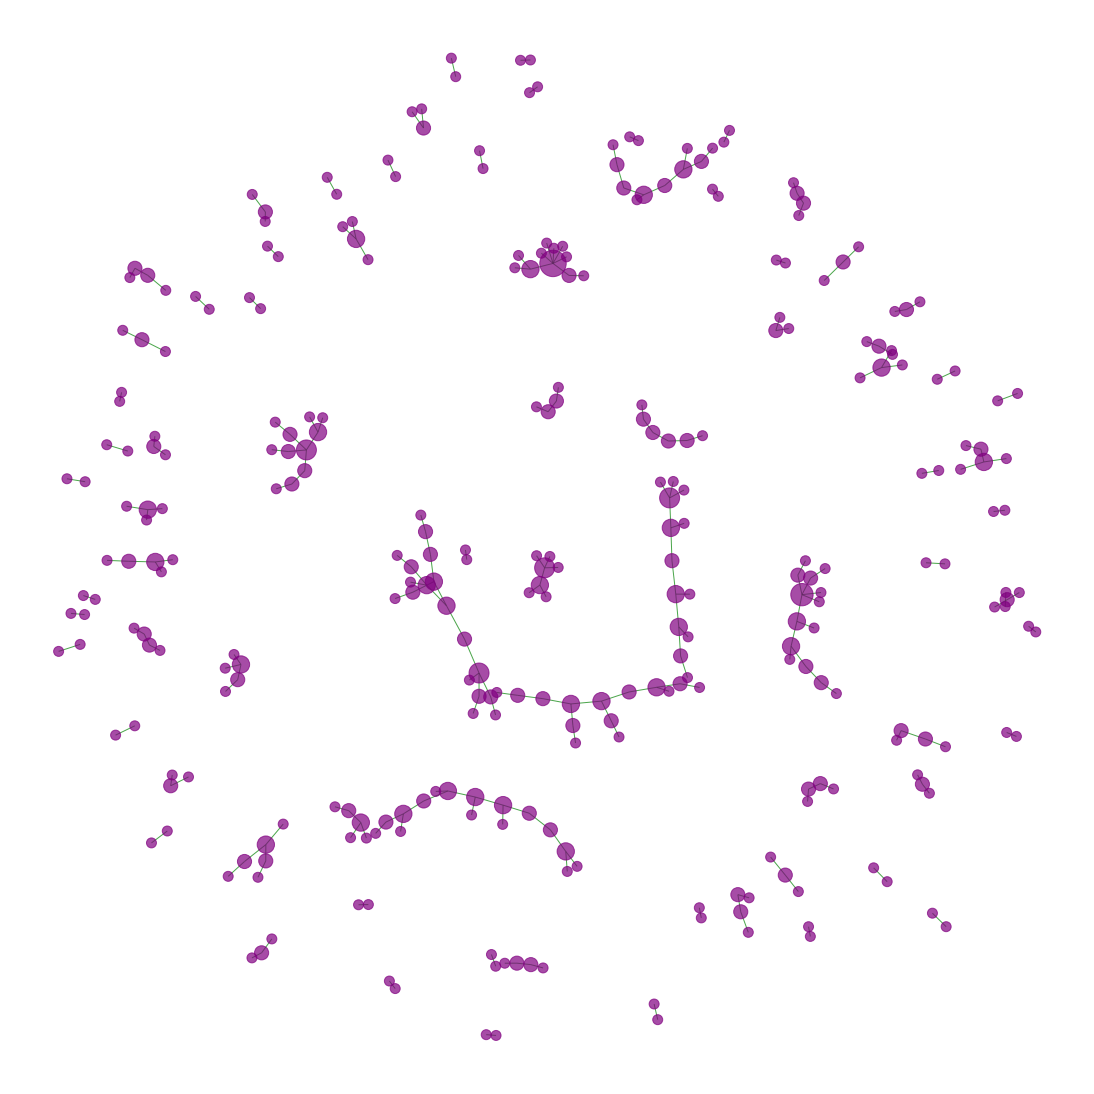

./graphs/erdos-renyi\critica\erdos_renyi_6_n500_p0.002.csv


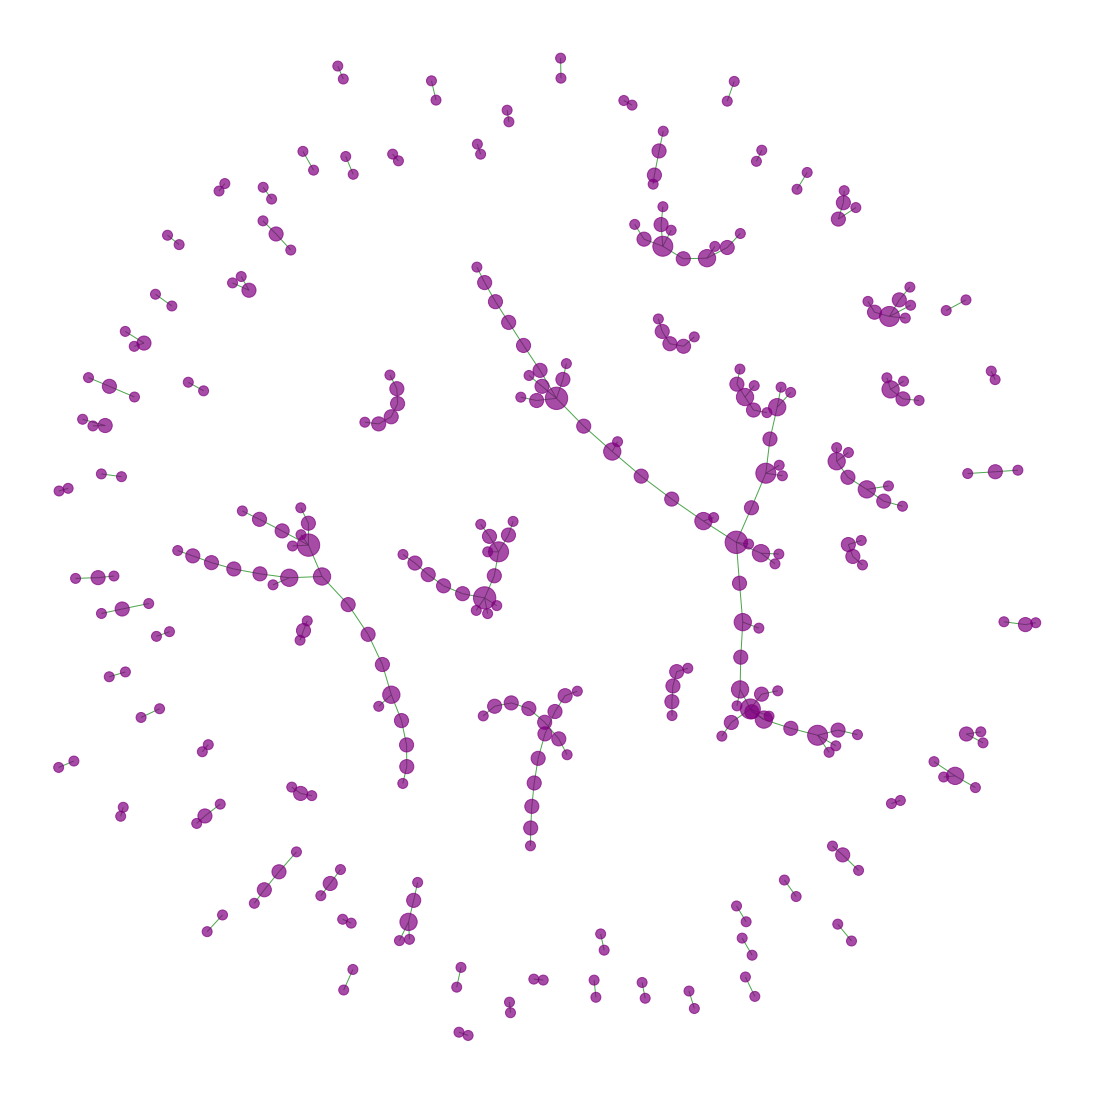

./graphs/erdos-renyi\critica\erdos_renyi_7_n500_p0.002.csv


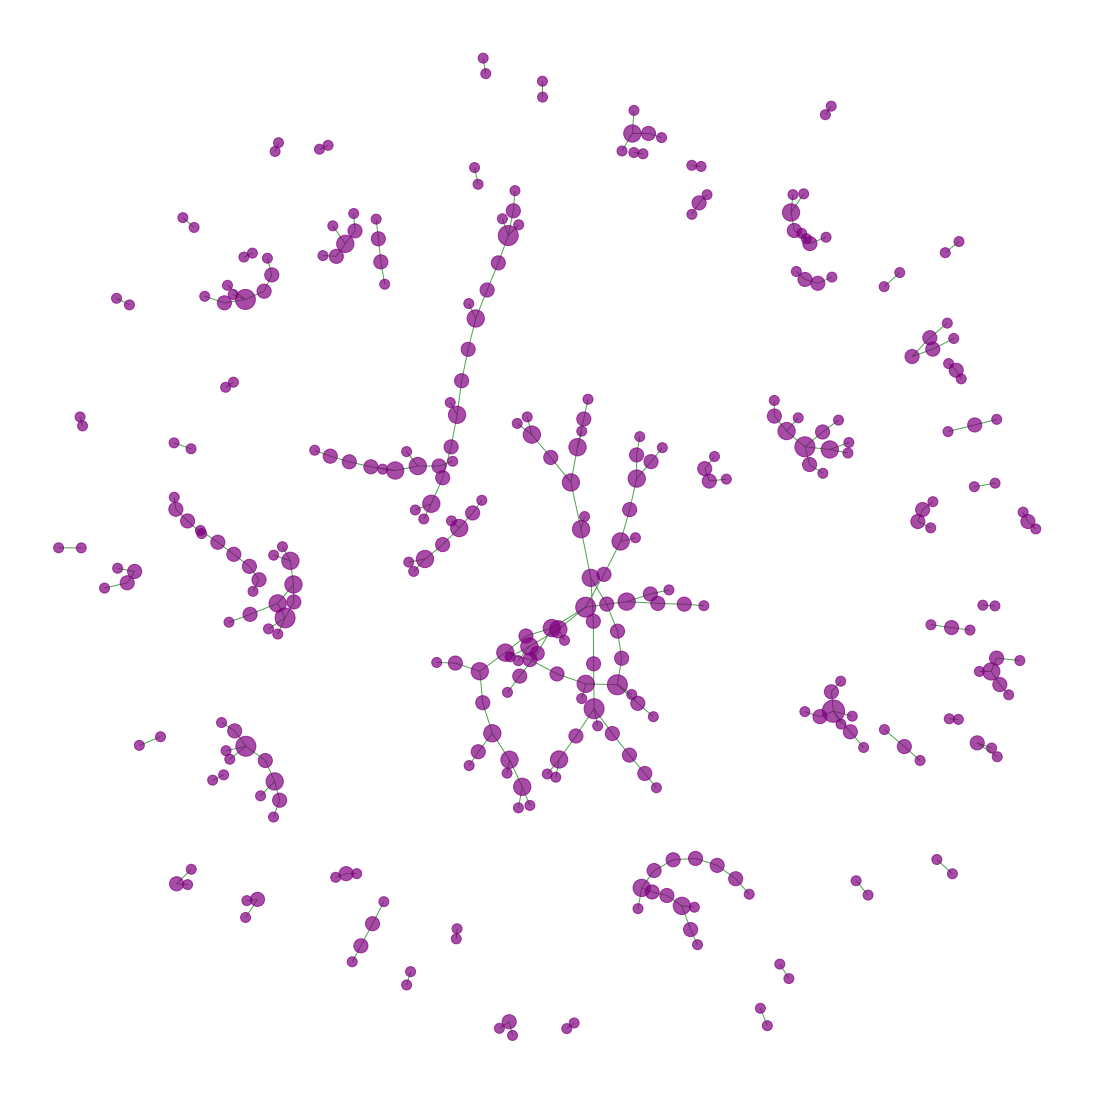

./graphs/erdos-renyi\critica\erdos_renyi_8_n500_p0.002.csv


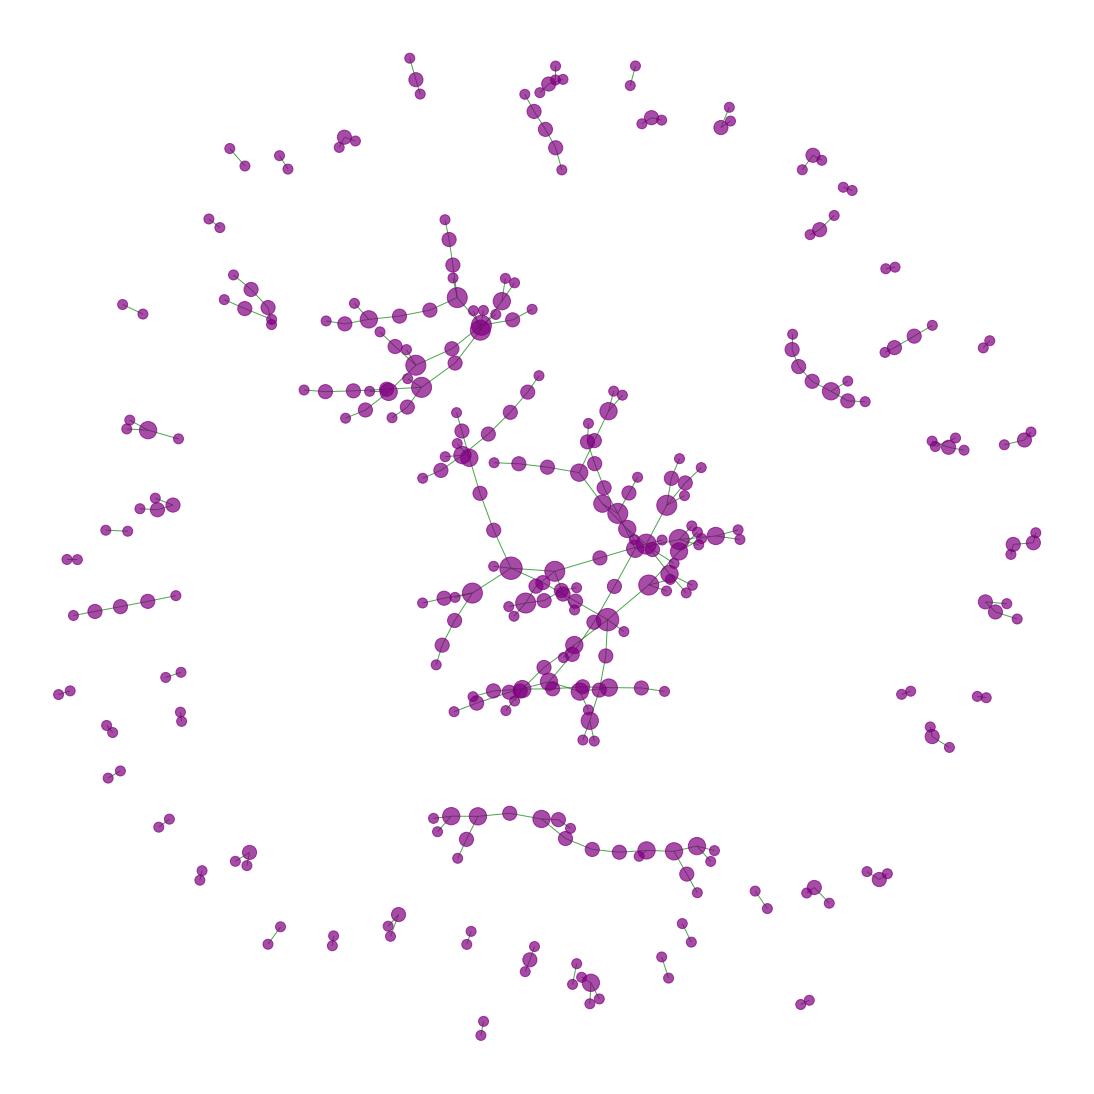

In [7]:
'''
erdos renyi graphs for every region with N=500
conectada p = 0.6
supercritica p = 0.3
critica p = 0.2
subcritica p = 0.1
'''
for i in range(57,61):
    print(files[i])
    draw_graph_node_size(g_list[i],15,15)

0 barabasi-albert\barabasi_albert_n500_m3.csv
5.964
6


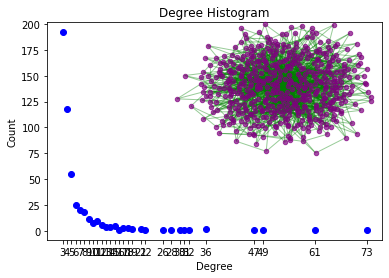

1 barabasi-albert\steps\ba-steps-010.csv
4.2
3


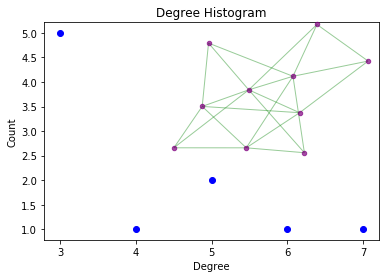

2 barabasi-albert\steps\ba-steps-050.csv
5.64
4


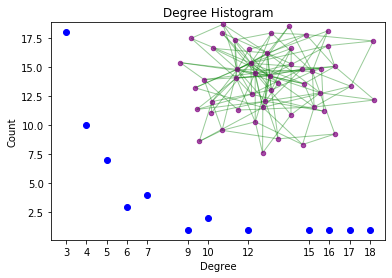

3 barabasi-albert\steps\ba-steps-250.csv
5.928
5


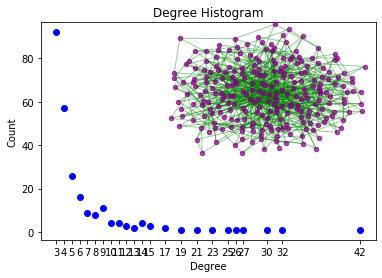

4 barabasi-albert\steps\ba-steps-500.csv
5.964
6


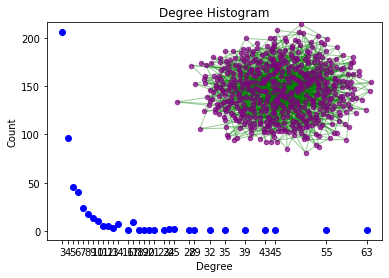

5 erdos-renyi\erdos_renyi_0_n500_p0.001.csv
1.3043478260869565
Infinite Diameter


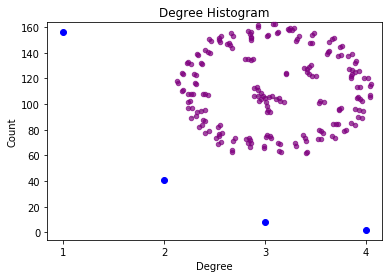

6 erdos-renyi\conectada\erdos_renyi_0_n500_p0.006.csv
3.0337552742616034
13


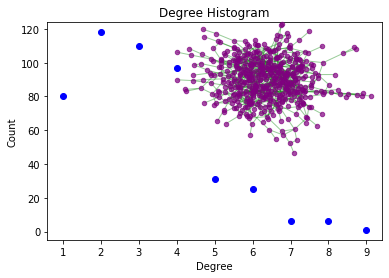

7 erdos-renyi\critica\erdos_renyi_0_n500_p0.002.csv
1.5808383233532934
Infinite Diameter


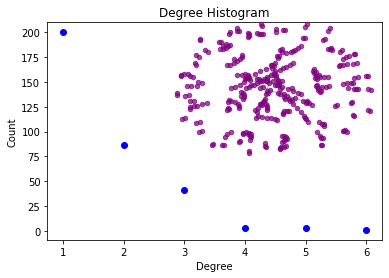

8 erdos-renyi\regions\conectada.csv
3.2572614107883817
Infinite Diameter


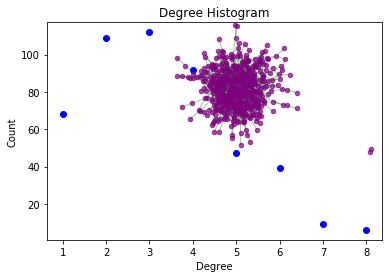

9 erdos-renyi\regions\critica.csv
1.623456790123457
Infinite Diameter


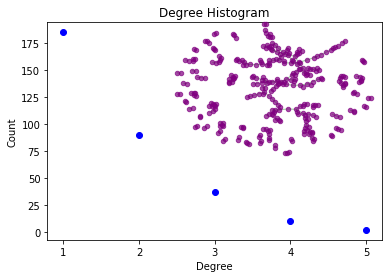

10 erdos-renyi\regions\subcritica.csv
1.2788461538461537
Infinite Diameter


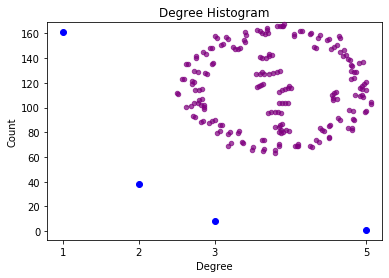

11 erdos-renyi\regions\supercritica.csv
1.8823529411764706
Infinite Diameter


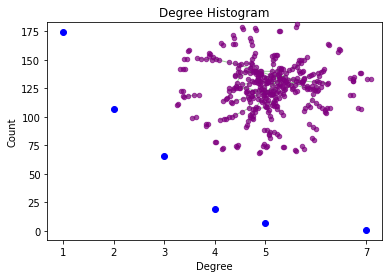

12 erdos-renyi\supercritica\erdos_renyi_0_n500_p0.003.csv
1.9272727272727272
Infinite Diameter


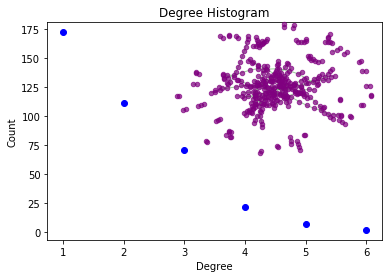

In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

#list of utils networks to analyze
#0, 4, 14, 22, 26, 31, 32, 42, 52, 62, 63, 64, 65, 76
networks = [4, 14, 22, 26, 31, 32, 42, 52, 62, 63, 64, 65, 76, 0]
new_g_list = []
new_files = []

for i in range(len(networks)-1):
    new_g_list.append(g_list[networks[i]])
    new_files.append(files[networks[i]])

for i,g in enumerate(new_g_list):
    print(i,new_files[i][9:])
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
    print(np.mean(degree_sequence))
    try:
        print(nx.diameter(g))
    except:
        print("Infinite Diameter")
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    #plt.bar(deg, cnt, width=0.80, color='b')
    plt.scatter(deg, cnt, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(deg)
    if True:
        # draw graph in inset
        plt.axes([0.4, 0.4, 0.5, 0.5])
        Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
        pos = nx.spring_layout(g)
        plt.axis('off')
        nx.draw_networkx_nodes(g, pos, node_size=20, node_color='purple', alpha=0.7)
        nx.draw_networkx_edges(g, pos, alpha=0.4, edge_color='green')

    plt.show()